In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from collections import Counter
from IPython.display import Image

In [7]:
def ImgDataGen():
    
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   rotation_range=0.3,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest')

    valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2
                                  )

    test_datagen  = ImageDataGenerator(rescale = 1./255)


    return train_datagen, test_datagen, valid_datagen

In [8]:
def DataSetGen(train, test, train_datagen, valid_datagen, test_datagen, classes_):
    
    train_dataset  = train_datagen.flow_from_directory(directory = 'C:/Users/RonN/Project PK/buat laporan/datasetplus/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   classes=classes_,
                                                   subset = 'training',
                                                   batch_size = 64)

    valid_dataset = train_datagen.flow_from_directory(directory = 'C:/Users/RonN/Project PK/buat laporan/datasetplus/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  classes=classes_,
                                                  subset = 'validation',
                                                  batch_size = 64)


    test_dataset = test_datagen.flow_from_directory(directory = 'C:/Users/RonN/Project PK/buat laporan/datasetplus/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  classes=classes_,
                                                  batch_size = 64)


    return train_dataset, valid_dataset, test_dataset

In [10]:
def plot_DG(data_generator):
    counter = Counter(data_generator.classes)
    data_items = counter.items()
    l = list(counter.items())
    print(l)
    
    plt.bar(range(len(l)), [val[1] for val in l], align='center')
    plt.xticks(range(len(l)), [val[0] for val in l])
    plt.xticks(rotation=70)
    plt.show()

In [11]:
def getClassWeights(train_dataset):
    
    counter = Counter(train_dataset.classes)                          
    max_val = float(max(counter.values()))       
    class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}    
    print(class_weights)

    return class_weights

In [12]:
def plotModel(model):
    
    plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
    Image(filename='convnet.png')

In [9]:
def updateBaseModel(base_model, num_classes):
    
    for layer in base_model.layers[:]:
        layer.trainable=True
    
    model=Sequential()
    model.add(base_model)
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(32,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [13]:
def ForTraining(model, save_h5_to_path, epochs_):
    
    lrd = ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    )

    mcp_5categories = ModelCheckpoint(save_h5_to_path)

    es = EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.00005,
        patience=10,
        verbose=1,
        restore_best_weights=True
    )

    t_epochs = epochs_

    optim = optimizers.Adam(learning_rate=1e-3, decay=1e-3 / t_epochs)
    model.compile(optimizer=optim, loss='categorical_crossentropy',metrics=METRICS)
    model.summary()

    return lrd, mcp_5categories, es, t_epochs, model, t_epochs

In [6]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.BinaryAccuracy(name='loss')
]

# Prepare Model

Found 18603 images belonging to 7 classes.
Found 4648 images belonging to 7 classes.
Found 23251 images belonging to 7 classes.
{0: 1.0184766214177978, 1: 1.0025983667409057, 2: 1.0089652596189764, 3: 1.012368815592204, 4: 1.0, 5: 1.057556773688332, 6: 1.0165600301091458}
[(0, 2652), (1, 2694), (2, 2677), (3, 2668), (4, 2701), (5, 2554), (6, 2657)]


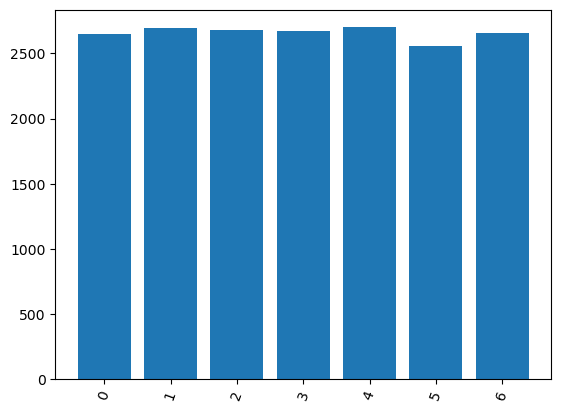

C:\Users\RonN\AppData\Local\Temp\ipykernel_23036\3508903782.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(input_shape=(48,48,3),include_top=False,weights="imagenet")
C:\Users\RonN\anaconda3\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [15]:
target_names = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
num_classes = len(target_names)
train_path = 'C:/Users/RonN/Project PK/buat laporan/datasetplus/train'
test_path = 'C:/Users/RonN/Project PK/buat laporan/datasetplus/test'
save_model_h5_to_path = 'inimodelprojek.h5'
epochs = 100

train_datagen, valid_datagen, test_datagen = ImgDataGen()
train_dataset, valid_dataset, test_dataset = DataSetGen(train_path, test_path, train_datagen, valid_datagen, test_datagen, target_names)
class_weights = getClassWeights(train_dataset)
plot_DG(train_dataset)

base_model = tf.keras.applications.MobileNet(input_shape=(48,48,3),include_top=False,weights="imagenet")

model = updateBaseModel(base_model, len(target_names))
lrd, mcp_5categories, es, t_epochs, model, t_epochs = ForTraining(model, save_model_h5_to_path, epochs)

# Training Model 

In [16]:
history1 = model.fit(train_dataset,validation_data=valid_dataset,epochs = t_epochs,verbose = 1,callbacks=[lrd,mcp_5categories,es], class_weight=class_weights)

Epoch 1/100


C:\Users\RonN\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


291/291 ━━━━━━━━━━━━━━━━━━━━ 79s 205ms/step - accuracy: 0.8535 - loss: 2.0683 - val_accuracy: 0.8695 - val_loss: 1.6503 - learning_rate: 0.0010
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.8665 - loss: 1.7121 - val_accuracy: 0.8833 - val_loss: 1.2740 - learning_rate: 0.0010
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.8766 - loss: 1.4705 - val_accuracy: 0.8853 - val_loss: 1.2910 - learning_rate: 0.0010
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 199ms/step - accuracy: 0.8846 - loss: 1.3410 - val_accuracy: 0.8913 - val_loss: 1.2150 - learning_rate: 0.0010
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 60s 203ms/step - accuracy: 0.8903 - loss: 1.2573 - val_accuracy: 0.8990 - val_loss: 1.1274 - learning_rate: 0.0010
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.8918 - loss: 1.2362 - val_accuracy: 0.9113 - val_loss: 0.9027 - learning_rate: 0.0010
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.8972 -

Epoch 43/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.9426 - loss: 0.6708 - val_accuracy: 0.9471 - val_loss: 0.5977 - learning_rate: 5.0000e-04
Epoch 44/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.9436 - loss: 0.6475 - val_accuracy: 0.9491 - val_loss: 0.5570 - learning_rate: 5.0000e-04
Epoch 45/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9439 - loss: 0.6374 - val_accuracy: 0.9498 - val_loss: 0.5461 - learning_rate: 5.0000e-04
Epoch 46/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9448 - loss: 0.6449 - val_accuracy: 0.9477 - val_loss: 0.5760 - learning_rate: 5.0000e-04
Epoch 47/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.9449 - loss: 0.6331 - val_accuracy: 0.9435 - val_loss: 0.6221 - learning_rate: 5.0000e-04
Epoch 48/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9455 - loss: 0.6212 - val_accuracy: 0.9496 - val_loss: 0.5700 - learning_rate: 5.0000e-04
Epoch 49/100
291/291 ━━━━━━━━━━━━━

Epoch 83/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 199ms/step - accuracy: 0.9600 - loss: 0.4612 - val_accuracy: 0.9531 - val_loss: 0.5237 - learning_rate: 6.2500e-05
Epoch 84/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9624 - loss: 0.4362 - val_accuracy: 0.9547 - val_loss: 0.5125 - learning_rate: 6.2500e-05
Epoch 85/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9610 - loss: 0.4442 - val_accuracy: 0.9547 - val_loss: 0.5141 - learning_rate: 6.2500e-05
Epoch 86/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9618 - loss: 0.4473 - val_accuracy: 0.9559 - val_loss: 0.5062 - learning_rate: 6.2500e-05
Epoch 86: early stopping
Restoring model weights from the end of the best epoch: 75.


# Graph for Accuracy dan Loss

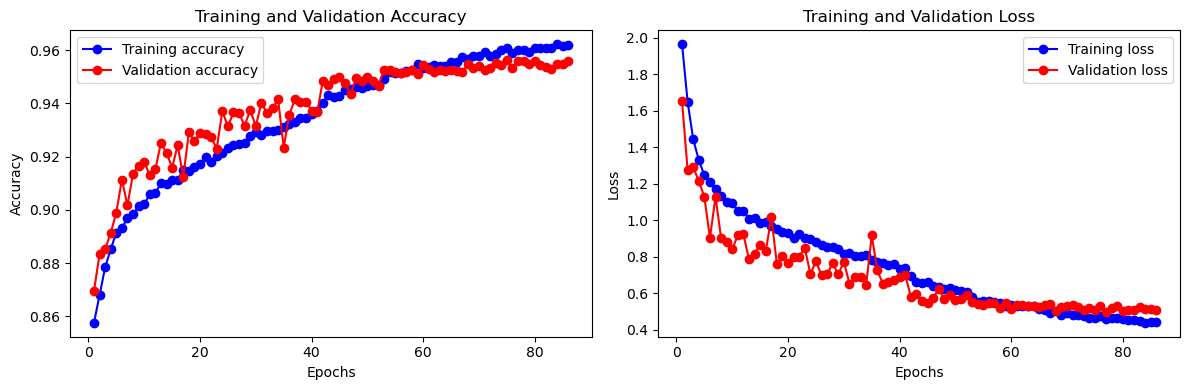

In [17]:
def Train_Val_Plot(train_acc, val_acc, train_loss, val_loss):
    epochs = range(1, len(train_acc) + 1)
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Train_Val_Plot(history1.history['accuracy'], history1.history['val_accuracy'],
                history1.history['loss'], history1.history['val_loss'])


In [84]:
model.save('inimodelpk.h5')